In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import datasets, layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

In [3]:
mnist = datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('The shape of the mnist train set are:', (x_train.shape, y_train.shape))
print('The shape of the mnist testing set are:', (x_test.shape, y_test.shape))

11493376/11490434 [==============================] - 0s 0us/step
The shape of the mnist train set are: ((60000, 28, 28), (60000,))
The shape of the mnist testing set are: ((10000, 28, 28), (10000,))


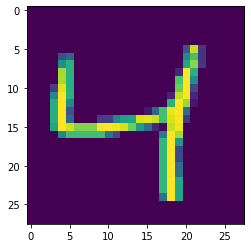

In [5]:
plt.imshow(x_train[2])

In [6]:
y_train.shape

(60000,)

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_example = to_categorical(y_train)

In [10]:
y_example.shape

(60000, 10)

In [11]:
y_cat_test = to_categorical(y_test)

In [12]:
y_cat_test.shape

(10000, 10)

In [13]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [14]:
x_test = x_test.reshape(10000, 28,28,1)

In [16]:
x_train = x_train/255
x_test = x_test/255

In [17]:
x_train.shape

(60000, 28, 28, 1)

In [18]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1), padding='valid', input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics= ['categorical_accuracy'])

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor= 'val_loss', patience=2)

In [20]:
history = model.fit(x_train, y_example, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[es])

Epoch 1/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1373 - categorical_accuracy: 0.9598 - val_loss: 0.0535 - val_categorical_accuracy: 0.9822
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0490 - categorical_accuracy: 0.9852 - val_loss: 0.0429 - val_categorical_accuracy: 0.9857
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0312 - categorical_accuracy: 0.9904 - val_loss: 0.0402 - val_categorical_accuracy: 0.9872
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0217 - categorical_accuracy: 0.9931 - val_loss: 0.0337 - val_categorical_accuracy: 0.9889
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0153 - categorical_accuracy: 0.9952 - val_loss: 0.0439 - val_categorical_accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0118 - categorical_accuracy: 0.9962 - val_loss: 0.0401 - val_categoric

In [22]:
history_df = pd.DataFrame(model.history.history)
history_df.head()

,loss,categorical_accuracy,val_loss,val_categorical_accuracy
0,0.137328,0.959817,0.053531,0.9822
1,0.049001,0.985183,0.042854,0.9857
2,0.031189,0.990383,0.040158,0.9872
3,0.021734,0.993083,0.033723,0.9889
4,0.015307,0.995150,0.043852,0.9866


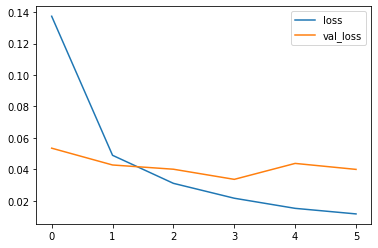

In [51]:
history_df[['loss', 'val_loss']].plot()

In [23]:
model.metrics_names

['loss', 'categorical_accuracy']

In [24]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.04005323350429535, 0.9868000149726868]

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
predictions = model.predict_classes(x_test)

In [32]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



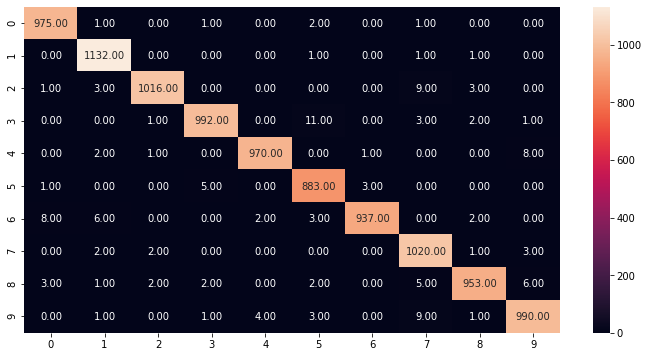

In [37]:
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='.2f')
plt.show()

In [50]:
sample_one = np.expand_dims(x_test[4550], axis=0)
model.predict_classes(sample_one)

array([9])

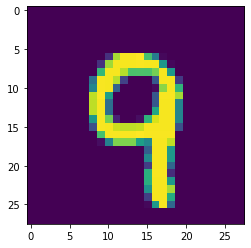

In [48]:
plt.imshow(x_test[4550].reshape(28,28))